In [2]:
import pandas as pd
housing=pd.read_csv('housing.csv')
housing.info()
#快速查看数据结构
#
#total_bedrooms有207个缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


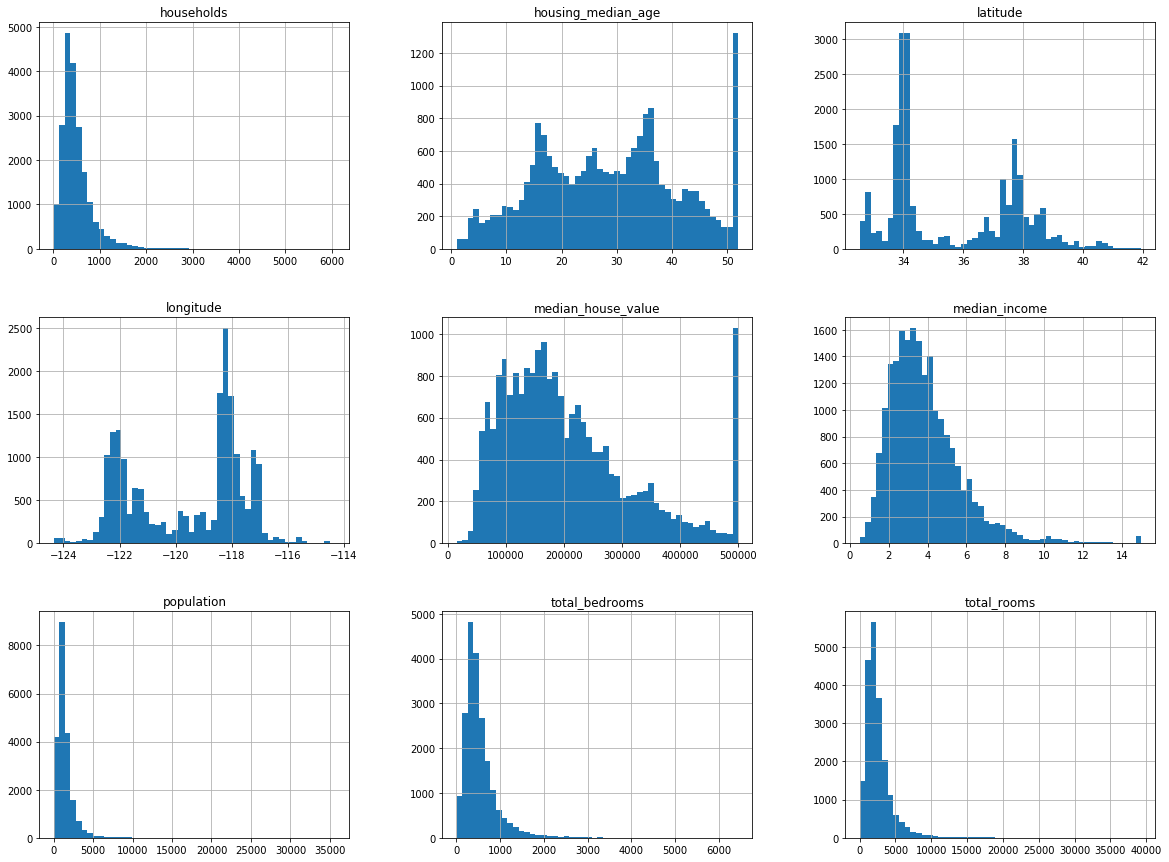

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
x=housing.iloc[:,0:8]
y=housing.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [7]:
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16338.000000,16512.000000,16512.000000,16512.000000
mean,-119.580176,35.642587,28.720264,2616.513687,534.158343,1418.154857,496.586604,3.864802
std,2.001678,2.139757,12.568015,2154.526931,414.236371,1128.846068,376.072733,1.888473
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,783.750000,279.000000,2.562500
50%,-118.500000,34.260000,29.000000,2115.000000,433.000000,1161.000000,409.000000,3.531300
75%,-118.010000,37.720000,37.000000,3127.000000,644.000000,1718.000000,602.250000,4.744150
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


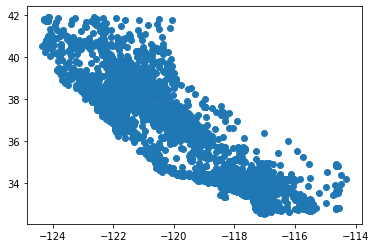

In [8]:
import matplotlib.pyplot as plt
plt.scatter(housing['longitude'],housing['latitude'])

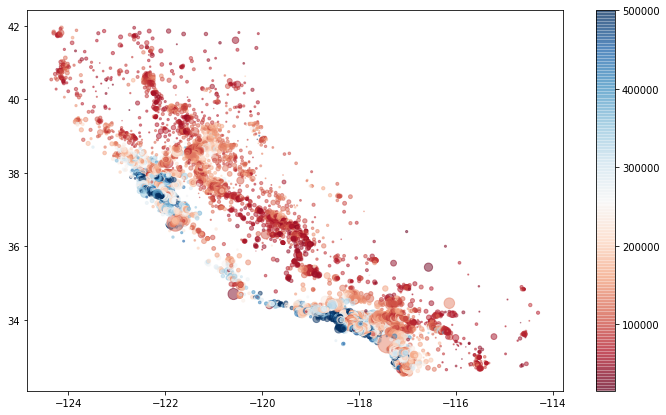

In [9]:
plt.rcParams['figure.figsize'] =(12,7)
cm = plt.cm.get_cmap('RdBu')
sc=plt.scatter(housing['longitude'],housing['latitude'],alpha=0.5,s=housing["population"]/100,c=housing["median_house_value"],cmap=cm)
plt.title="population"
plt.colorbar(sc)

plt.show()

In [10]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


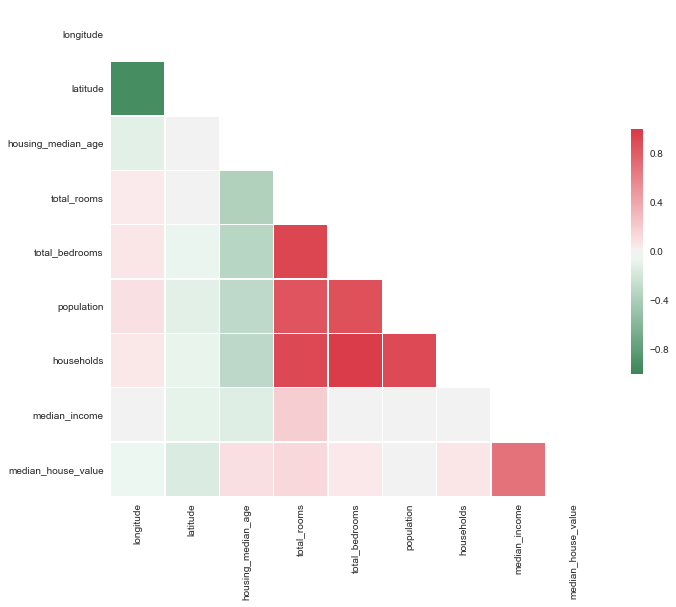

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = pd.DataFrame(data=housing,
                 columns=list(housing.columns))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing1=pd.get_dummies(housing)
housing1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [14]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null float64
total_rooms                   20640 non-null float64
total_bedrooms                20640 non-null float64
population                    20640 non-null float64
households                    20640 non-null float64
median_income                 20640 non-null float64
median_house_value            20640 non-null float64
ocean_proximity_<1H OCEAN     20640 non-null uint8
ocean_proximity_INLAND        20640 non-null uint8
ocean_proximity_ISLAND        20640 non-null uint8
ocean_proximity_NEAR BAY      20640 non-null uint8
ocean_proximity_NEAR OCEAN    20640 non-null uint8
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [16]:
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [22]:
x_data1=housing1.iloc[:,0:8]
x_data2=housing1.iloc[:,9:14]
y_data=housing1.iloc[:,8]
x_data=pd.concat([x_data1,x_data2],axis=1)
x_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,0,0,0,1,0


In [23]:
y_data

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [27]:

import warnings;warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR=LinearRegression()
scores=cross_val_score(LR,x_data,y_data,cv=5)
print(scores.mean())

0.5595691259136366


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
scores=cross_val_score(gbr,x_data,y_data,cv=5)
print(scores.mean())

0.5822328438773672
